In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:,[2,3]] #for any row use column 3 and 4

y = iris.target

print(np.unique(y)) # The class names Iris-setosa, Iris-versicolor, and Iris-virginica are stored as integer for technical and memory issues



[0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42, stratify=y) #stratify make sure all data are proportional using Y

print(np.bincount(y_test))# Counting the number of the Y tests

[15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train) # Trying to fing propeer scaler i.e std deviation and mean for the X _train values

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

x_combined = np.vstack((X_test_std,X_train_std))
y_combined = np.hstack((y_test,y_train))

x_combined_std = sc.transform(x_combined)

print(X_train_std, X_train)






[[-0.4419858  -0.13661044]
 [ 0.40282929  0.38029394]
 [-1.2868009  -1.17041921]
 [ 1.19132338  1.41410271]
 [ 0.17754527  0.12184175]
 [ 0.79707634  1.41410271]
 [-1.2868009  -1.4288714 ]
 [-1.23047989 -1.29964531]
 [-1.3431219  -1.29964531]
 [ 1.19132338  1.15565051]
 [ 0.74075533  1.02642442]
 [-1.3431219  -1.29964531]
 [-1.23047989 -1.29964531]
 [ 0.40282929  0.38029394]
 [ 0.00858225 -0.13661044]
 [ 1.24764439  0.76797223]
 [-1.23047989 -1.04119311]
 [-1.23047989 -1.29964531]
 [ 1.07868137  1.6725549 ]
 [ 0.57179231  0.76797223]
 [-1.2868009  -1.04119311]
 [ 0.62811332  0.76797223]
 [ 1.58557043  1.15565051]
 [ 1.64189143  1.02642442]
 [ 0.23386627 -0.00738435]
 [-1.3431219  -1.17041921]
 [-1.2868009  -1.04119311]
 [-1.39944291 -1.04119311]
 [ 0.62811332  0.38029394]
 [ 0.12122426  0.12184175]
 [-1.2868009  -1.04119311]
 [-1.3431219  -1.17041921]
 [ 0.17754527 -0.26583654]
 [-0.10405976  0.12184175]
 [-1.3431219  -1.4288714 ]
 [-1.3431219  -1.17041921]
 [ 0.34650829  0.25106784]
 

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_Decision(x,y,classifire, resolution = 0.02):
    markers = "o","*","s","d"
    colors = ("blue","green","red","yellow")
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Creaye a unique color for each value Y



    x_min, x_max =(x[:,0].min()-1,x[:,0].max() + 1) #Padding
    x1_min,x2_max = (x[:,1].min() - 1, x[:1].max() + 1)    
    xx1,xx2 = np.meshgrid(np.arange(x_min,x_max,resolution), np.arange(x1_min,x2_max,resolution)) #Np.arreange(start, stop,increment)
    #meshgrid converts from 1D to ND(2)

    lab = classifire.predict(np.array([xx1.ravel(),  xx2.ravel()]).T) # ravel flatens the values , T is transpose
    lab = lab.reshape(xx1.shape) # xx1 have same shape as xx2

    plt.contourf(xx1,xx2,lab, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y == cl,1 ], color = colors[idx], marker = markers[idx],edgecolor = "black")


C:\Users\Aron\AppData\Local\Temp\ipykernel_19484\97946264.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = "upper left")


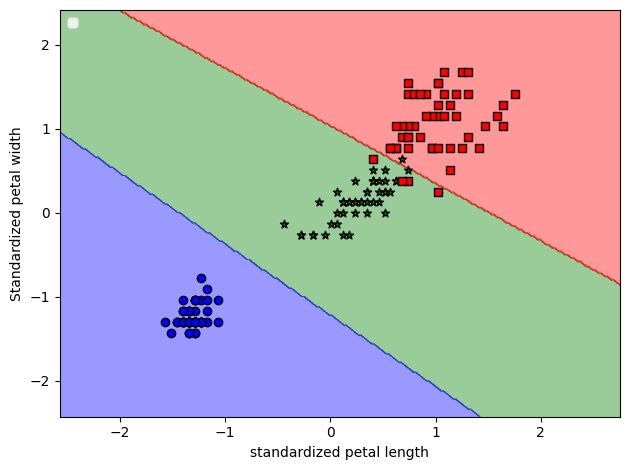

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel= "linear", C = 1.0, random_state= 1)

svm.fit(X_train_std, y_train)

plot_Decision(x_combined, y_combined, classifire= svm)

plt.xlabel("standardized petal length")
plt.ylabel("Standardized petal width")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()




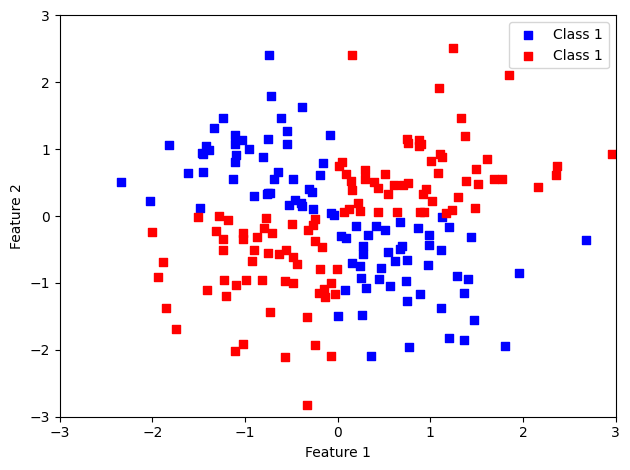

In [7]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(41)

x0r = np.random.randn(200,2)

yor = np.logical_xor(x0r[:,0]>0, x0r[:,1]>0)

yor = np.where(yor,1,0)


plt.scatter(x0r[yor == 1, 0], x0r[ yor == 1, 1], c = "blue", marker = 's', label = "Class 1")

plt.scatter(x0r[yor == 0, 0], x0r[ yor == 0, 1], c = "red", marker = 's', label = "Class 1")

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = "best")
plt.tight_layout()
plt.show()


C:\Users\Aron\AppData\Local\Temp\ipykernel_19484\2595083759.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


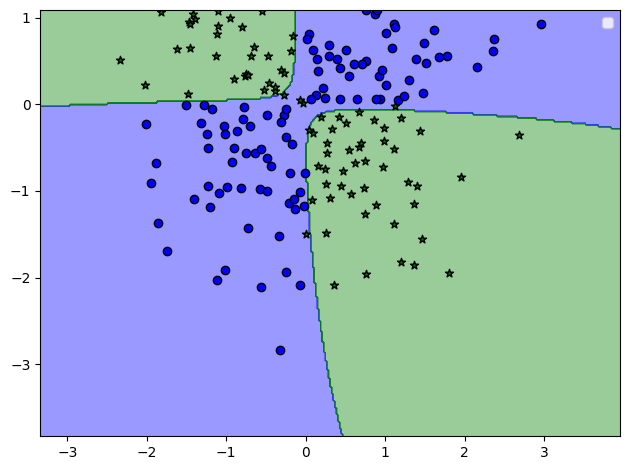

In [8]:
svm = SVC(kernel = 'rbf', random_state= 1, gamma = 0.10, C = 10.0) #RBF is the  Radial Basis Function kernel (non-linear)
svm.fit(x0r, yor)
plot_Decision(x0r,yor, classifire = svm)

plt.legend(loc = 'best')
plt.tight_layout()

plt.show()

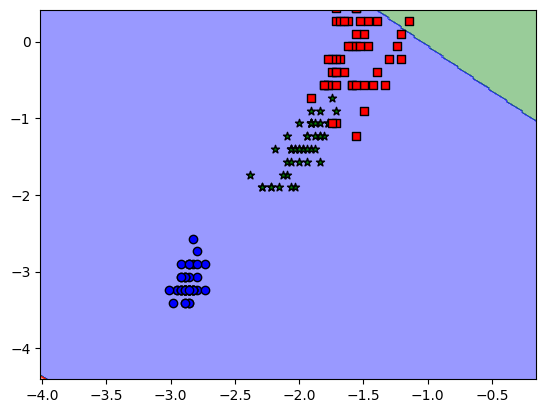

In [ ]:
svm = SVC(kernel= 'rbf', random_state= 1, gamma= 0.2, C = 0.1)
svm.fit(X_train_std, y_train)

plot_Decision(x_combined_std, y_combined, classifire= svm)
plt.show()
